# <b> <u>Problem Statement</u></b>

### Picture this. You are a data scientist in a start-up culture with the potential to have a very large impact on the business. Oh, and you are backed up by a company with 140 years' business experience.

### Curious? Great! You are the kind of person we are looking for.

### Prudential, one of the largest issuers of life insurance in the USA, is hiring passionate data scientists to join a newly-formed Data Science group solving complex challenges and identifying opportunities. The results have been impressive so far but they want more.

### In a one-click shopping world with on-demand everything, the life insurance application process is antiquated. Customers provide extensive information to identify risk classification and eligibility, including scheduling medical exams, a process that takes an average of 30 days.

### The result? People are turned off. That’s why only 40% of U.S. households own individual life insurance. Prudential wants to make it quicker and less labor intensive for new and existing customers to get a quote while maintaining privacy boundaries.

### By developing a predictive model that accurately classifies risk using a more automated approach, you can greatly impact public perception of the industry.

### The results will help Prudential better understand the predictive power of the data points in the existing assessment, enabling them to significantly streamline the process.

# <b><u>Variable Description

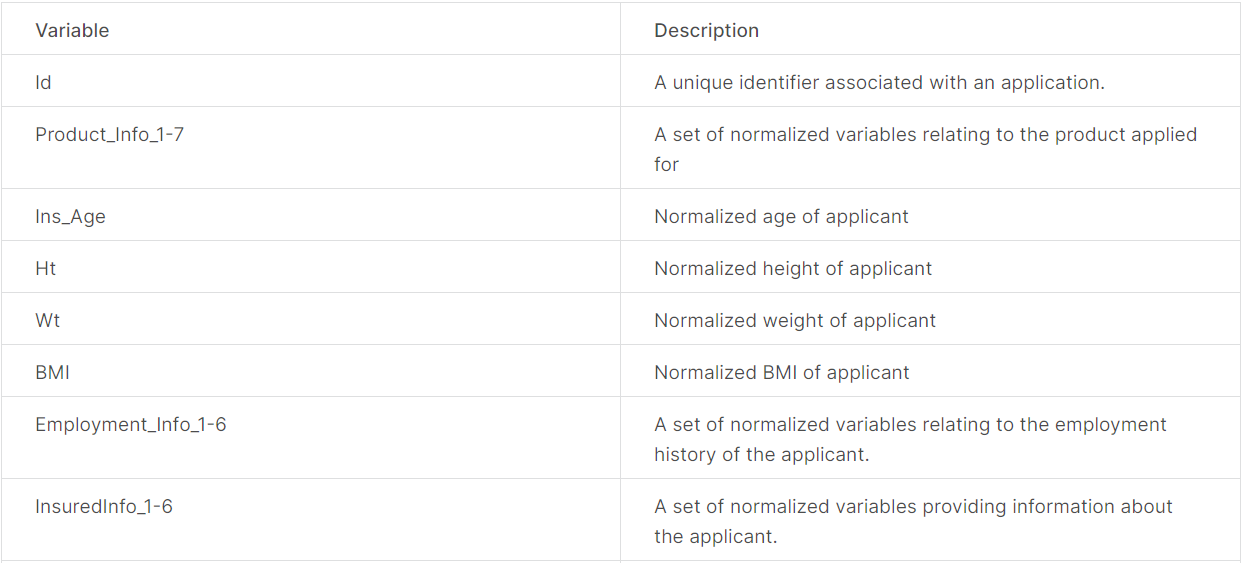

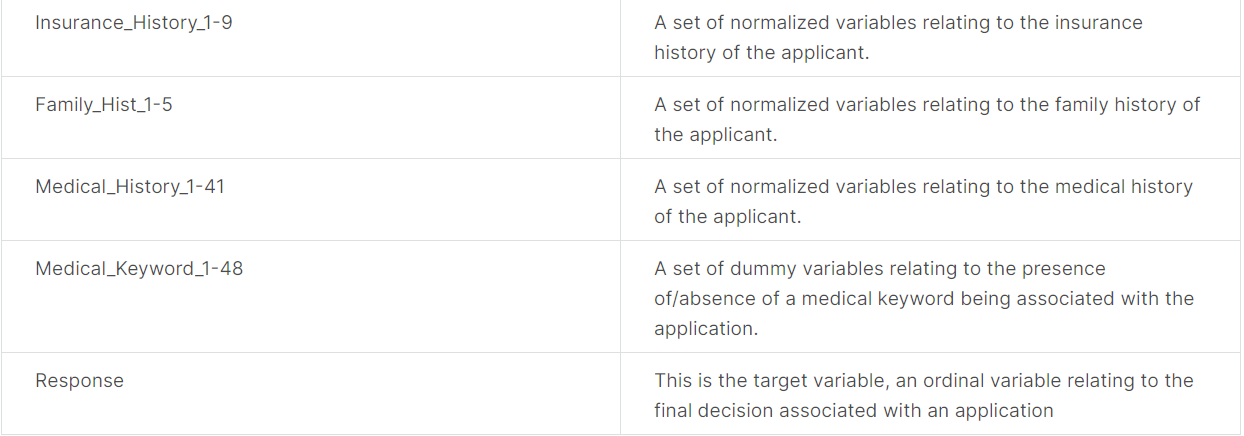

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading the data

In [7]:
path = "/content/drive/MyDrive/Copy of train.csv"
data_raw = pd.read_csv(path, index_col='Id')

In [8]:
data = data_raw.copy()

In [9]:
data.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Id,,,,,,,,,,,,,,,,,,,,,
2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,8
5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,4
6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,8
7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,8
8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,8


In [10]:
data.shape

(59381, 127)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59381 entries, 2 to 79146
Columns: 127 entries, Product_Info_1 to Response
dtypes: float64(18), int64(108), object(1)
memory usage: 58.0+ MB


## Exploring the dependent variable

In [12]:
data['Response'].value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

In [13]:
data['Response'].isnull().sum()

0

<Axes: xlabel='Response', ylabel='count'>

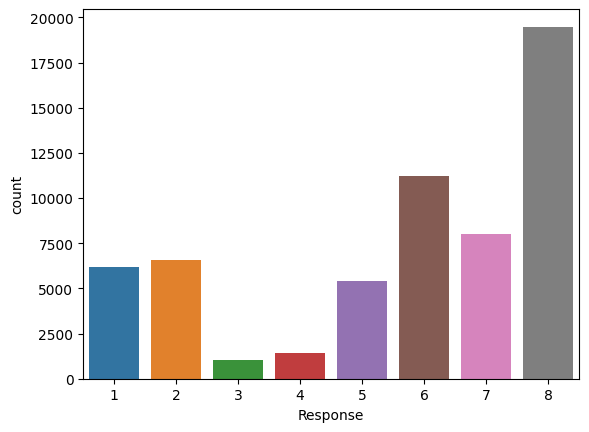

In [14]:
sns.countplot(x=data['Response'])

## Converting the dependent variable to a binary variable (two possible labels/classes)

In [15]:
def modified_response(row):
  if ((row['Response'] <=7) & (row['Response'] >=0) ):
    val = 0
  elif (row['Response']==8):
    val = 1
  else:
    val = -1

  return val

In [16]:
data['Modified_Response'] = data.apply(modified_response,axis = 1)

In [17]:
data.shape

(59381, 128)

In [18]:
data['Modified_Response'].value_counts()

0    39892
1    19489
Name: Modified_Response, dtype: int64

<Axes: xlabel='Modified_Response', ylabel='count'>

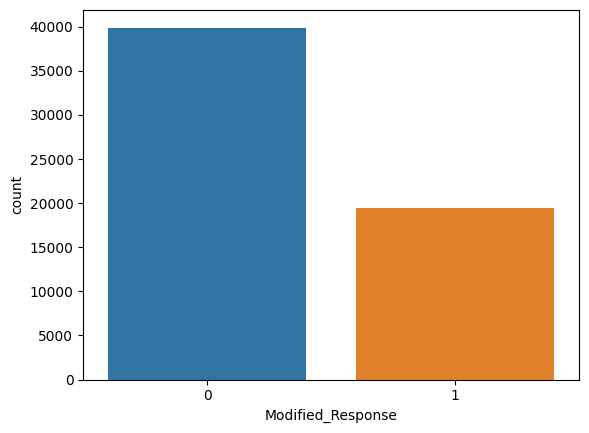

In [19]:
sns.countplot(x= data['Modified_Response'])

In [20]:
data.drop('Response',axis = 1, inplace=True)

In [21]:
data.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Modified_Response
Id,,,,,,,,,,,,,,,,,,,,,
2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,1
5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,0
6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,1
7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,1
8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,1


In [22]:
data.describe(include='all')

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Modified_Response
count,59381.000000,59381,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
unique,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,14321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.026355,NaN,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,0.328203
std,0.160191,NaN,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,0.469563
min,1.000000,NaN,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,NaN,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,NaN,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,NaN,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [23]:
data['Medical_Keyword_17'].value_counts()

0    58837
1      544
Name: Medical_Keyword_17, dtype: int64

In [24]:
data['Medical_Keyword_48'].value_counts()

0    56145
1     3236
Name: Medical_Keyword_48, dtype: int64

In [25]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [26]:
data.corr()

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Modified_Response
Product_Info_1,1.000000,0.027573,0.059829,0.069720,-0.078684,0.012169,-0.077429,0.052720,-0.004035,-0.037130,0.047371,0.032271,-0.039832,0.008507,-0.018840,0.011871,-0.041654,0.002911,0.002709,-0.047523,0.013376,-0.047975,0.011357,0.013058,0.007242,-0.008187,0.015076,0.010613,0.006753,0.012547,0.008191,-0.001294,-0.054089,-0.017769,-0.056415,-0.013988,0.022124,0.005200,-0.017654,-0.022528,0.005489,0.008830,-0.000740,-0.002164,0.002007,-0.155339,-0.001493,-0.004357,0.007037,0.003845,-0.030431,0.006451,0.004598,0.001497,-0.009154,0.008965,0.001156,-0.004913,0.034479,-0.020301,-0.020741,0.022710,0.012216,-0.009307,0.004215,-0.007327,-0.007955,0.040738,-0.055632,-0.024576,-0.005298,-0.025444,-0.008999,0.012726,0.022837,-0.004703,0.015176,-0.013485,0.003356,-0.021427,-0.008578,0.005124,-0.001615,0.019955,0.000738,-0.005704,-0.002277,0.010436,0.004590,-0.001816,0.000856,-0.036699,-0.002719,-0.000372,0.008864,-0.007173,0.004998,0.007143,0.001019,0.055918,-0.001985,-0.018417,0.004536,-0.005395,-0.004660,-0.008189,-0.008202,-0.008154,0.002827,-0.006149,0.001988,-0.003620,-0.004441,0.007081,-0.007272,0.002378,-0.002782,0.004495,-0.007697,-0.014055,-0.008247,-0.006719,-0.010638,0.004402,-0.008469,-0.019621
Product_Info_3,0.027573,1.000000,0.048775,0.025419,-0.018855,0.015581,0.001005,0.293546,0.213546,0.083288,0.151442,0.191771,-0.241939,-0.026332,-0.764707,-0.005204,-0.033652,0.019398,-0.004991,-0.056197,0.026939,-0.398228,0.029694,0.009949,0.010795,0.033448,-0.022591,0.020219,-0.038518,0.038793,-0.032734,0.020843,-0.010492,0.010921,-0.001724,0.006095,0.009945,-0.033661,-0.041289,-0.090907,-0.004510,-0.045986,-0.005644,-0.006406,0.027212,0.024096,0.005088,-0.001422,0.055416,0.004776,-0.015096,0.009401,-0.003260,-0.018012,-0.071991,0.046969,-0.0

## Dropping the columns with more than 40% null values

In [27]:
missing_val_count_by_column = data.isnull().sum()/len(data)

print(missing_val_count_by_column[missing_val_count_by_column > 0.4].sort_values(ascending=False))

Medical_History_10     0.990620
Medical_History_32     0.981358
Medical_History_24     0.935990
Medical_History_15     0.751015
Family_Hist_5          0.704114
Family_Hist_3          0.576632
Family_Hist_2          0.482579
Insurance_History_5    0.427679
dtype: float64


In [28]:
data = data.dropna(thresh=data.shape[0]*0.4,axis=1) #,how='all'

In [29]:
list(data.columns)

['Product_Info_1',
 'Product_Info_2',
 'Product_Info_3',
 'Product_Info_4',
 'Product_Info_5',
 'Product_Info_6',
 'Product_Info_7',
 'Ins_Age',
 'Ht',
 'Wt',
 'BMI',
 'Employment_Info_1',
 'Employment_Info_2',
 'Employment_Info_3',
 'Employment_Info_4',
 'Employment_Info_5',
 'Employment_Info_6',
 'InsuredInfo_1',
 'InsuredInfo_2',
 'InsuredInfo_3',
 'InsuredInfo_4',
 'InsuredInfo_5',
 'InsuredInfo_6',
 'InsuredInfo_7',
 'Insurance_History_1',
 'Insurance_History_2',
 'Insurance_History_3',
 'Insurance_History_4',
 'Insurance_History_5',
 'Insurance_History_7',
 'Insurance_History_8',
 'Insurance_History_9',
 'Family_Hist_1',
 'Family_Hist_2',
 'Family_Hist_3',
 'Family_Hist_4',
 'Medical_History_1',
 'Medical_History_2',
 'Medical_History_3',
 'Medical_History_4',
 'Medical_History_5',
 'Medical_History_6',
 'Medical_History_7',
 'Medical_History_8',
 'Medical_History_9',
 'Medical_History_11',
 'Medical_History_12',
 'Medical_History_13',
 'Medical_History_14',
 'Medical_History_16'

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59381 entries, 2 to 79146
Columns: 122 entries, Product_Info_1 to Modified_Response
dtypes: float64(13), int64(108), object(1)
memory usage: 55.7+ MB


In [31]:
data['Product_Info_2'].head(20)

Id
2     D3
5     A1
6     E1
7     D4
8     D2
10    D2
11    A8
14    D2
15    D3
16    E1
17    D3
18    D4
19    A2
20    D1
22    D4
23    A7
24    D4
25    D3
26    D3
27    D4
Name: Product_Info_2, dtype: object

In [32]:
data['Product_Info_2'].value_counts()

D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
Name: Product_Info_2, dtype: int64

### Dropping the categorical variable since it has a lot of categories

In [33]:
data.drop('Product_Info_2',axis=1,inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## <b>Start building baseline models (Random Forest Classifier & XGBoost Classifier)

In [34]:
data.columns

Index(['Product_Info_1', 'Product_Info_3', 'Product_Info_4', 'Product_Info_5',
       'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Modified_Response'],
      dtype='object', length=121)

In [35]:
# Data for all the independent variables
X = data.drop(labels='Modified_Response',axis=1)

# Data for the dependent variable
Y = data['Modified_Response']

In [36]:
X = X.fillna(X.mean())

In [37]:
X.shape, Y.shape

((59381, 120), (59381,))

## Splitting the data into train and test

In [38]:
# Train-test split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)

In [39]:
# Check the shape of train dataset
print(X_train.shape,Y_train.shape)

# Check the shape of test dataset
print(X_test.shape, Y_test.shape)

(44535, 120) (44535,)
(14846, 120) (14846,)


In [40]:
X_train.isna().sum() #or isnull

Product_Info_1         0
Product_Info_3         0
Product_Info_4         0
Product_Info_5         0
Product_Info_6         0
Product_Info_7         0
Ins_Age                0
Ht                     0
Wt                     0
BMI                    0
Employment_Info_1      0
Employment_Info_2      0
Employment_Info_3      0
Employment_Info_4      0
Employment_Info_5      0
Employment_Info_6      0
InsuredInfo_1          0
InsuredInfo_2          0
InsuredInfo_3          0
InsuredInfo_4          0
InsuredInfo_5          0
InsuredInfo_6          0
InsuredInfo_7          0
Insurance_History_1    0
Insurance_History_2    0
Insurance_History_3    0
Insurance_History_4    0
Insurance_History_5    0
Insurance_History_7    0
Insurance_History_8    0
Insurance_History_9    0
Family_Hist_1          0
Family_Hist_2          0
Family_Hist_3          0
Family_Hist_4          0
Medical_History_1      0
Medical_History_2      0
Medical_History_3      0
Medical_History_4      0
Medical_History_5      0


## Training a Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

## Provide the range of values for chosen hyperparameters

In [42]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [43]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [44]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.2s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [49]:
rf_grid.score(X_train, Y_train) #our code

0.8926813663327968

In [50]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=40, min_samples_split=150)

In [51]:
rf_optimal_model = rf_grid.best_estimator_

In [52]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 150,
 'n_estimators': 100}

In [53]:
# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(X_train)
test_class_preds = rf_optimal_model.predict(X_test)


# Get the probabilities on train and test
#Refer below text for reason behind adding below 2 lines of code, main reason is it is used in "KS Scores"
train_preds = rf_optimal_model.predict_proba(X_train)[:,1]
test_preds = rf_optimal_model.predict_proba(X_test)[:,1]

It's worth noting that the values in train_class_preds and test_class_preds will be the class labels (integers), whereas the values in train_preds and test_preds will be the class probabilities (floating-point numbers) of the positive class (class 1). The class probabilities can be useful when you want to set custom thresholds for making predictions based on probability scores.

In [54]:
len(train_preds)

44535

In [55]:
test_class_preds

array([0, 1, 0, ..., 0, 0, 1])

In [57]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix, classification_report

In [58]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(Y_train,train_class_preds)
test_accuracy = accuracy_score(Y_test,test_class_preds) #Y_test, Y_pred

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8133827326821601
The accuracy on test dataset is 0.8086353226458305


In [59]:
print(classification_report(Y_test,test_class_preds))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      9985
           1       0.75      0.62      0.68      4861

    accuracy                           0.81     14846
   macro avg       0.79      0.76      0.77     14846
weighted avg       0.80      0.81      0.80     14846



In [60]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(Y_train,train_class_preds)
test_cm = confusion_matrix(Y_test,test_class_preds )

In [61]:
train_cm

array([[27011,  2896],
       [ 5415,  9213]])

In [62]:
test_cm

array([[9006,  979],
       [1862, 2999]])

In [63]:
#2752/(2752+889) - Precision
#2752/(2752+2109) - Recall

In [64]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(Y_train,train_preds)
test_auc = roc_auc_score(Y_test,test_preds)

In [65]:
train_auc

0.8926813663327968

In [66]:
test_auc

0.8865447317242063

In [67]:
X_train.columns

Index(['Product_Info_1', 'Product_Info_3', 'Product_Info_4', 'Product_Info_5',
       'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI',
       ...
       'Medical_Keyword_39', 'Medical_Keyword_40', 'Medical_Keyword_41',
       'Medical_Keyword_42', 'Medical_Keyword_43', 'Medical_Keyword_44',
       'Medical_Keyword_45', 'Medical_Keyword_46', 'Medical_Keyword_47',
       'Medical_Keyword_48'],
      dtype='object', length=120)

In [68]:
rf_optimal_model.feature_importances_

array([2.37546478e-04, 3.32089523e-03, 2.91595562e-02, 3.35443202e-05,
       2.06049849e-04, 2.07400639e-05, 3.27751750e-02, 1.64018795e-02,
       1.55114684e-01, 2.66768599e-01, 2.42912152e-03, 1.05229382e-03,
       1.14142412e-03, 6.23026026e-04, 2.04474384e-03, 1.77854591e-03,
       3.63083138e-03, 1.12586148e-03, 4.53529060e-04, 3.66464851e-04,
       8.25734618e-04, 2.57612718e-02, 1.85075272e-03, 1.11610383e-04,
       9.00175158e-04, 3.58044447e-04, 3.68331552e-04, 2.39807457e-03,
       4.56296226e-04, 2.11382930e-04, 3.16154071e-04, 4.86308097e-03,
       1.42752120e-02, 5.59129815e-03, 1.77710082e-02, 6.10919749e-03,
       1.31893390e-03, 4.20677686e-04, 1.13783454e-01, 7.01339614e-05,
       5.82756547e-03, 1.38818485e-05, 2.65460754e-04, 2.16004192e-04,
       5.03969732e-05, 2.83894616e-05, 1.95234640e-03, 8.17645810e-07,
       3.84520475e-03, 1.14681962e-04, 8.46449436e-05, 3.08003182e-05,
       6.42888199e-04, 1.51908619e-04, 1.55336630e-05, 9.44739135e-02,
      

In [69]:
importances = rf_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [70]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [71]:
importance_df.head()

,Feature,Feature Importance
0,Product_Info_1,0.00
1,Product_Info_3,0.00
2,Product_Info_4,0.03
3,Product_Info_5,0.00
4,Product_Info_6,0.00


In [72]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
9,BMI,0.27
8,Wt,0.16
38,Medical_History_4,0.11
86,Medical_Keyword_15,0.11
55,Medical_History_23,0.09
2,Product_Info_4,0.03
6,Ins_Age,0.03
21,InsuredInfo_6,0.03
34,Family_Hist_4,0.02
74,Medical_Keyword_3,0.02


### MODEL EXPLAINABILITY

In [74]:
!pip install shap

In [75]:
import shap
shap.initjs()

In [76]:
#explainer_train = shap.TreeExplainer(rf_model)
#shap_values_train = explainer_train.shap_values(X_train)

AssertionError: ignored

In [88]:
X_shap = X_train
explainer_train = shap.TreeExplainer(rf_optimal_model)
shap_values_train = explainer.shap_values(X_shap)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


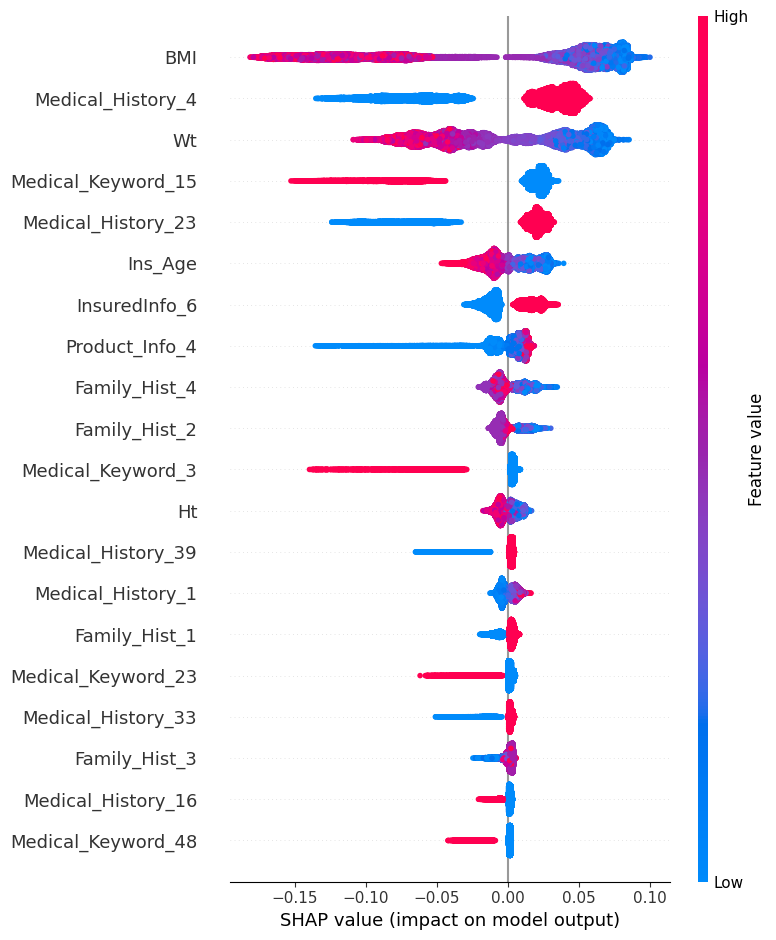

In [79]:
shap.summary_plot(shap_values_train[1],X_train,plot_type='dot')

In [81]:
explainer_test = shap.TreeExplainer(rf_optimal_model)
shap_values_test = explainer_test.shap_values(X_test)

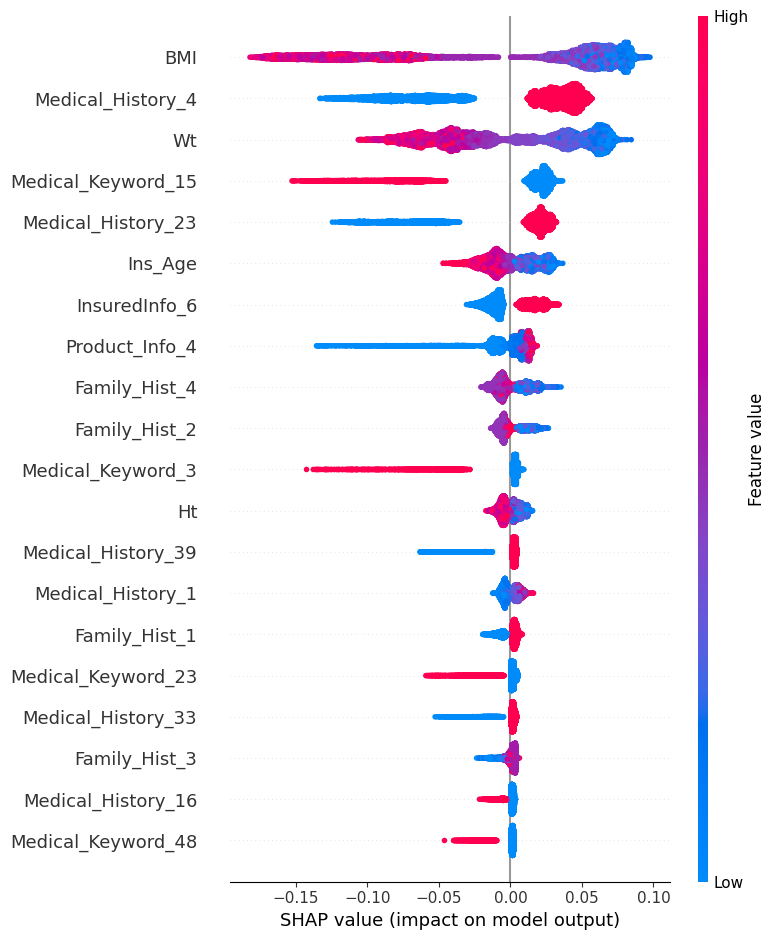

In [84]:
shap.summary_plot(shap_values_test[1],X_test,plot_type='dot')

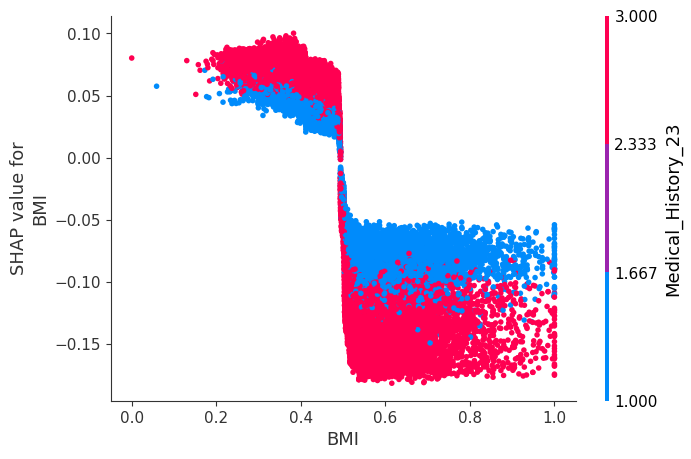

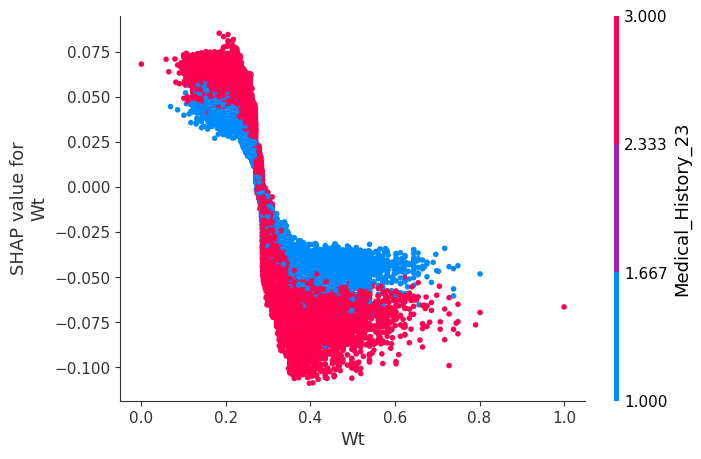

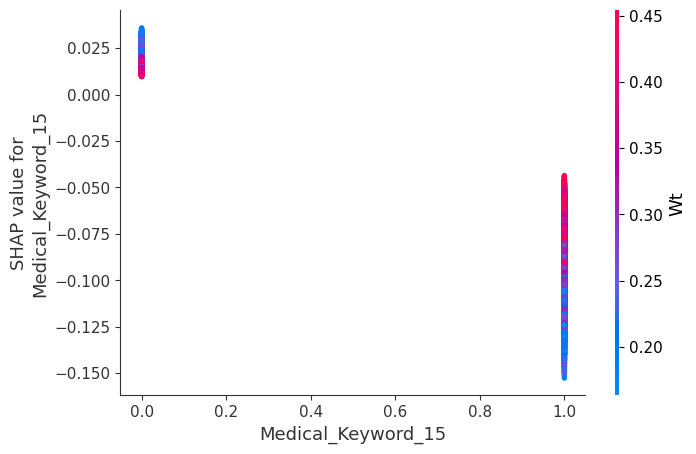

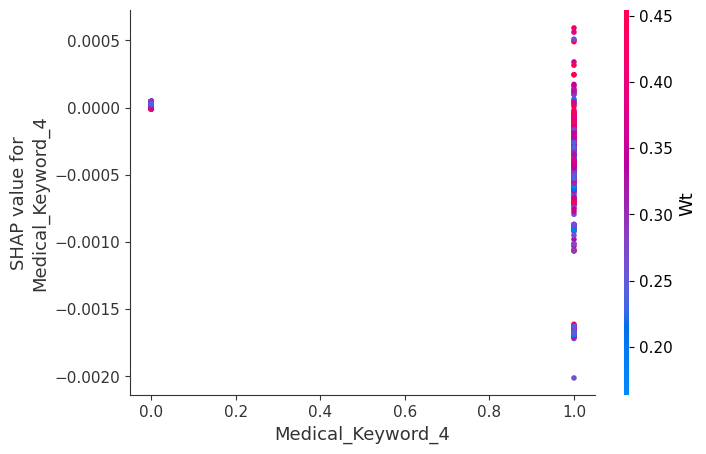

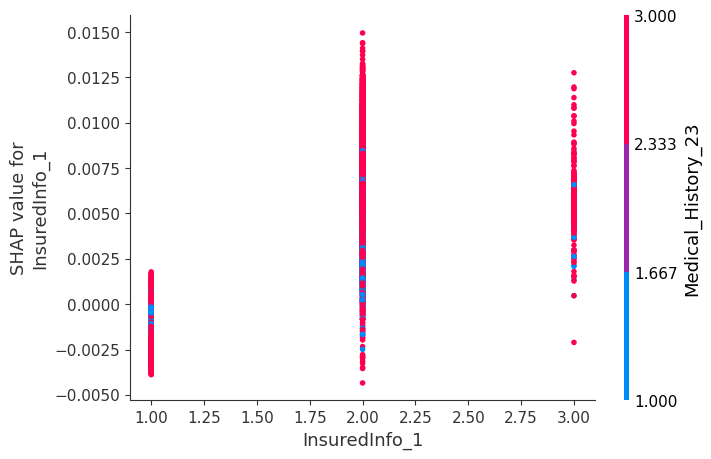

In [85]:
top_vars = ['BMI', 'Wt', 'Medical_Keyword_15', 'Medical_Keyword_4','InsuredInfo_1']
for elem in top_vars:
  shap.dependence_plot(elem, shap_values_train[1], X_train)

In [89]:
shap.initjs()
shap.force_plot(explainer_train.expected_value[0], shap_values_train[0][:,0], X_train.iloc[:,0])

Output hidden; open in https://colab.research.google.com to view.

### XG Boost Model

In [94]:
from xgboost import XGBClassifier